In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
%matplotlib inline

In [35]:
from pathlib import Path

In [36]:
from collections import defaultdict

In [37]:
results_path = Path("results/")

In [38]:
dev_success = defaultdict(list)
pt_success = defaultdict(list)

for result_path in results_path.iterdir():
    name = result_path.name
    if name.endswith(("dev_success", "pt_success")):
        k = int(name[:name.index(".")])
        value = float(result_path.read_text().strip())
        if name.endswith("dev_success"):
            dev_success[k].append(value)
        elif name.endswith("pt_success"):
            pt_success[k].append(value)

In [39]:
dev_success

defaultdict(list,
            {0: [93.592,
              96.252,
              92.811,
              94.687,
              92.343,
              94.065,
              93.749,
              93.906,
              93.125,
              92.656,
              95.0,
              93.593,
              93.438,
              93.906,
              95.002,
              95.468,
              94.063,
              93.75,
              93.437,
              94.531,
              94.376,
              93.126,
              93.438,
              93.125,
              94.531,
              94.375,
              92.186,
              93.907,
              93.125,
              92.187,
              93.907,
              93.75,
              93.906,
              95.781,
              94.063,
              93.905,
              94.533,
              93.594,
              94.219,
              91.56,
              92.342,
              95.314,
              91.094,
              93.592,
              94

In [40]:
print([len(xs) for xs in dev_success.values()])
print([len(xs) for xs in pt_success.values()])

[50, 50, 50, 50, 50, 50, 50, 50]
[50, 50, 50, 50, 50, 50, 50, 50]


In [41]:
keys = sorted(dev_success.keys())

In [42]:
dev_success = np.array([dev_success[key] for key in keys])
pt_success = np.array([pt_success[key] for key in keys])

In [43]:
dev_success.shape

(8, 50)

In [44]:
x_entries = [2 ** x for x in range(8)]

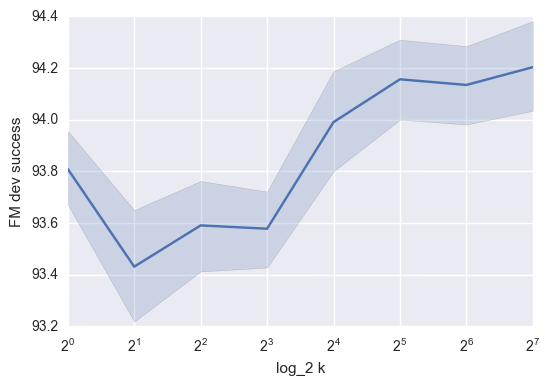

In [45]:
ax = plt.subplot()
ax.set_xlim(0, 64)
ax.set_ylabel("FM dev success")
ax.set_xlabel("log_2 k")
ax.set_xscale("log", basex=2)
sns.tsplot(dev_success.T, time=x_entries, ax=ax)

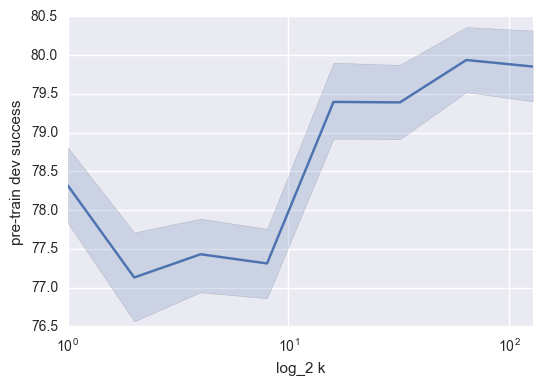

In [46]:
ax = plt.subplot()
ax.set_xlim(0, 64)
ax.set_ylabel("pre-train dev success")
ax.set_xlabel("log_2 k")
ax.set_xscale("log", base=2)
#ax.set_xticks(np.power(2, np.arange(8)))
#ax.set_xticklabels(["$2^%i$" % x for x in range(8)])
sns.tsplot(pt_success.T, time=x_entries, ax=ax)